In [1]:
from ai2thor.controller import Controller
import numpy as np
import math
import matplotlib.pyplot as plt
import time
from collections import deque

In [2]:
# controller = Controller(
#     agentMode="arm",
#     massThreshold=None,
#     scene="FloorPlan1",
#     visibilityDistance=1.5,
#     gridSize=0.25,
#     renderDepthImage=False,
#     renderInstanceSegmentation=False,
#     width=900,
#     height=900,
#     fieldOfView=60
# )

In [40]:
controller.reset("FloorPlan11")
controller.step('Pass')

<ai2thor.server.Event at 0x11231e640
    .metadata["lastAction"] = Pass
    .metadata["lastActionSuccess"] = True
    .metadata["errorMessage"] = "
    .metadata["actionReturn"] = None
>

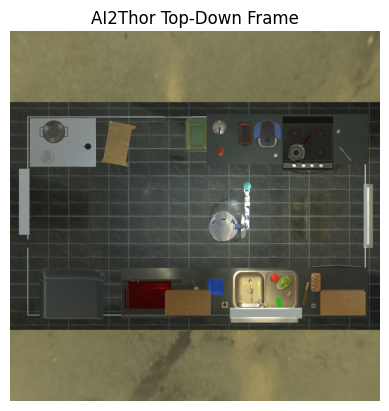

Executing: LookDown
Success: True
Executing: Pass
Success: True
Executing: RotateRight
Success: True
Executing: Pass
Success: True
Executing: MoveAhead
Success: True
Executing: Pass
Success: True
Executing: MoveAhead
Success: True
Executing: Pass
Success: True
Executing: RotateLeft
Success: True
Executing: Pass
Success: True
Executing: RotateRight
Success: True
Executing: Pass
Success: True
Executing: MoveAhead
Success: True
Executing: Pass
Success: True
Executing: MoveAhead
Success: True
Executing: Pass
Success: True
Executing: RotateLeft
Success: True
Executing: Pass
Success: True
Executing: RotateRight
Success: True
Executing: Pass
Success: True
Executing: MoveAhead
Success: True
Executing: Pass
Success: True
Executing: RotateLeft
Success: True
Executing: Pass
Success: True
Executing: MoveAhead
Success: True
Executing: Pass
Success: True
Executing: RotateRight
Success: True
Executing: Pass
Success: True
Executing: RotateRight
Success: True
Executing: Pass
Success: True
Executing: Mo

In [41]:
controller.step(action='ToggleMapView')
top_down_event = controller.last_event

# Capture the top-down view image
top_down_frame = top_down_event.frame 

# Toggle back to the original view
controller.step(action='ToggleMapView')
controller.step("Pass")
plt.imshow(top_down_frame) 
plt.axis('off') # Turn off axis labels and ticks 
plt.title('AI2Thor Top-Down Frame') 
plt.show()

In [42]:
event = controller.last_event
agent_pos = event.metadata["agent"]["position"]
floorplan = event.metadata["sceneName"]

burners = [obj for obj in event.metadata["objects"] if obj["objectType"] == "StoveBurner"]

if burners:
    mid_x = sum(b["position"]["x"] for b in burners) / len(burners)
    mid_y = sum(b["position"]["y"] for b in burners) / len(burners)
    mid_z = sum(b["position"]["z"] for b in burners) / len(burners)
    stove_pos = {"x": mid_x, "y": mid_y, "z": mid_z}
    stove_rot = burners[0]["rotation"]

    print("Floorplan:", floorplan)
    print("Agent Position:", agent_pos)
    print("Stove Position (midpoint of burners):", stove_pos)
    print("Stove Rotation (from first burner):", stove_rot)
else:
    print("No stove burners found")

Floorplan: FloorPlan11_physics
Agent Position: {'x': 1.2500001192092896, 'y': 0.9009991884231567, 'z': -0.75}
Stove Position (midpoint of burners): {'x': 1.1840499639511108, 'y': 0.9576473832130432, 'z': 0.4277999922633171}
Stove Rotation (from first burner): {'x': -0.0, 'y': 180.00006103515625, 'z': 0.0}


In [6]:
controller.step(
    action="MoveArm",
    position={"x":0.5,"y":-0.5,"z":0.5},
    coordinateSpace="wrist",
    restrictMovement=False,
    speed=1.0,
    returnToStart=False,
    fixedDeltaTime=0.02
)
controller.step(action = "Pass")

<ai2thor.server.Event at 0x111e5cc40
    .metadata["lastAction"] = Pass
    .metadata["lastActionSuccess"] = True
    .metadata["errorMessage"] = "
    .metadata["actionReturn"] = None
>

In [7]:
controller.step(
    action="MoveArmBase",
    y=0.55,
    speed=1,
    returnToStart=True,
    fixedDeltaTime=0.02
)
controller.step(action = "Pass")

<ai2thor.server.Event at 0x111e04d30
    .metadata["lastAction"] = Pass
    .metadata["lastActionSuccess"] = True
    .metadata["errorMessage"] = "
    .metadata["actionReturn"] = None
>

In [8]:
controller.last_event.metadata["arm"]["handSphereCenter"]

{'x': -1.7316598892211914, 'y': 1.0318408012390137, 'z': 1.490659236907959}

In [9]:
import threading
import ipywidgets as widgets
from IPython.display import display, clear_output

# Set your ai2thor controller
# from ai2thor.controller import Controller
# controller = Controller()

button_layout = widgets.Layout(width='100px')

# Define buttons
move_ahead_button = widgets.Button(description="Move Ahead", layout=button_layout)
rotate_left_button = widgets.Button(description="Rotate Left", layout=button_layout)
rotate_right_button = widgets.Button(description="Rotate Right", layout=button_layout)
look_up_button = widgets.Button(description="Look Up", layout=button_layout)
look_down_button = widgets.Button(description="Look Down", layout=button_layout)
confirm_button = widgets.Button(description="Confirm", layout=button_layout)

# Optional reset button
reset_button = widgets.Button(description="Reset", layout=button_layout, button_style='danger')

# Output widget
output = widgets.Output()

# Action dispatcher
def run_action(action):
    def thread_func():
        with output:
            print(f"Executing: {action}")
            try:
                event = controller.step(action=action)
                print(f"Success: {event.metadata['lastActionSuccess']}")
            except Exception as e:
                print(f"Error: {e}")
    t = threading.Thread(target=thread_func)
    t.start()

# Click handler
def on_button_click(b):
    action_map = {
        "Move Ahead": "MoveAhead",
        "Rotate Right": "RotateRight",
        "Rotate Left": "RotateLeft",
        "Look Up": "LookUp",
        "Look Down": "LookDown",
        "Confirm": "Pass",  # or a custom confirm action
        "Reset": "Reset"
    }
    action = action_map.get(b.description)
    if action:
        run_action(action)

# Connect handlers
for btn in [
    move_ahead_button, rotate_left_button, rotate_right_button,
    look_up_button, look_down_button, confirm_button, reset_button
]:
    btn.on_click(on_button_click)

# Layout
blank = widgets.Label(value="", layout=button_layout)

display(widgets.VBox([
    widgets.HBox([blank, look_up_button, blank]),
    widgets.HBox([rotate_left_button, confirm_button, rotate_right_button, move_ahead_button]),
    widgets.HBox([blank, look_down_button, blank]),
    widgets.HBox([reset_button]),
]))

display(output)


Output()

In [33]:
import threading
import ipywidgets as widgets
from IPython.display import display, clear_output

output = widgets.Output()
button_layout = widgets.Layout(width='100px')

# Buttons
move_up_button = widgets.Button(description="Up", layout=button_layout)
move_down_button = widgets.Button(description="Down", layout=button_layout)
move_left_button = widgets.Button(description="Left", layout=button_layout)
move_right_button = widgets.Button(description="Right", layout=button_layout)
move_forward_button = widgets.Button(description="Forward", layout=button_layout)
move_back_button = widgets.Button(description="Back", layout=button_layout)
confirm_button = widgets.Button(description="Confirm", layout=button_layout, button_style="success")
toggle_button = widgets.Button(description="Toggle Stove", layout=button_layout, button_style="info")
reset_button = widgets.Button(description="Reset", layout=button_layout, button_style="danger")

# Current hand position (absolute)
curr_hand_pos = {"x": 0.0, "y": 0.0, "z": 0.5}
increment = 0.1  # step size

# Adjust position locally
def adjust_hand(dx=0, dy=0, dz=0):
    with output:
        global curr_hand_pos
        curr_hand_pos['x'] += dx
        curr_hand_pos['y'] += dy
        curr_hand_pos['z'] += dz
        print(f"Adjusted preview pos: {curr_hand_pos}")

# Confirm move
def confirm_move():
    def thread_func():
        with output:
            print(f"Confirming move to absolute position: {curr_hand_pos}")
            try:
                event = controller.step(
                    action="MoveArm",
                    position=curr_hand_pos,
                    coordinateSpace="armBase",
                    restrictMovement=False,
                    speed=1.0,
                    returnToStart=False,
                    fixedDeltaTime=0.02
                )
                print(f"Success: {event.metadata.get('lastActionSuccess', False)}")
                controller.step("Pass")
            except Exception as e:
                print(f"Error: {e}")
    threading.Thread(target=thread_func).start()

# Toggle stove knob (smart: on if off, off if on)
def toggle_stove():
    def thread_func():
        with output:
            try:
                event = controller.step("Pass")
                hand_pos = event.metadata["arm"]["handSphereCenter"]

                def dist(obj):
                    pos = obj["position"]
                    return ((pos["x"] - hand_pos["x"])**2 +
                            (pos["y"] - hand_pos["y"])**2 +
                            (pos["z"] - hand_pos["z"])**2) ** 0.5

                knobs = [obj for obj in event.metadata["objects"] if obj["visible"] and obj["objectType"] == "StoveKnob"]
                if not knobs:
                    print("No visible stove knobs.")
                    return

                closest = min(knobs, key=dist)
                if dist(closest) < 0.08:
                    action = "ToggleObjectOff" if closest["isToggled"] else "ToggleObjectOn"
                    result = controller.step(action=action, objectId=closest["objectId"])
                    print(f"Toggled {closest['name']} -> {action}, success: {result.metadata['lastActionSuccess']}")
                else:
                    print("Closest stove knob is out of range.")
            except Exception as e:
                print(f"Error: {e}")
    threading.Thread(target=thread_func).start()

# Reset
def reset_position():
    global curr_hand_pos
    curr_hand_pos = {"x": 0.0, "y": 0.0, "z": 0.5}
    with output:
        print("Hand position reset:", curr_hand_pos)

# Bind
move_up_button.on_click(lambda b: adjust_hand(dy=increment))
move_down_button.on_click(lambda b: adjust_hand(dy=-increment))
move_left_button.on_click(lambda b: adjust_hand(dx=-increment))
move_right_button.on_click(lambda b: adjust_hand(dx=increment))
move_forward_button.on_click(lambda b: adjust_hand(dz=increment))
move_back_button.on_click(lambda b: adjust_hand(dz=-increment))
confirm_button.on_click(lambda b: confirm_move())
toggle_button.on_click(lambda b: toggle_stove())
reset_button.on_click(lambda b: reset_position())

blank = widgets.Label(value="", layout=button_layout)

# Layout
display(widgets.VBox([
    widgets.HBox([blank, move_up_button, blank]),
    widgets.HBox([move_left_button, confirm_button, move_right_button]),
    widgets.HBox([move_forward_button, toggle_button, move_back_button]),
    widgets.HBox([blank, move_down_button, blank]),
    widgets.HBox([reset_button]),
]))

display(output)


Output()

In [11]:
#TELEPORT CODE STARTS HERE 

In [34]:
controller.step(
    action="MoveArm",
    position={"x": 0.0, "y": 0.7, "z": 0.5},  # y higher, z zero to point arm up
    coordinateSpace="armBase",
    restrictMovement=False,
    speed=0.01,
    returnToStart=False,
    fixedDeltaTime=0.02,
)
controller.step('Pass')

<ai2thor.server.Event at 0x112810dc0
    .metadata["lastAction"] = Pass
    .metadata["lastActionSuccess"] = True
    .metadata["errorMessage"] = "
    .metadata["actionReturn"] = None
>

Confirming move to absolute position: {'x': 0.0, 'y': 0.1, 'z': 0.5}
Success: False
Executing: RotateRight
Success: True
Executing: Pass
Success: True
Confirming move to absolute position: {'x': 0.0, 'y': 0.2, 'z': 0.5}
Success: True
Executing: RotateLeft
Success: False
Executing: Pass
Success: True
Confirming move to absolute position: {'x': 0.0, 'y': 0.30000000000000004, 'z': 0.5}
Success: True
Executing: RotateLeft
Success: False
Executing: Pass
Success: True
Confirming move to absolute position: {'x': 0.0, 'y': 0.20000000000000004, 'z': 0.5}
Success: True
Confirming move to absolute position: {'x': 0.0, 'y': 0.10000000000000003, 'z': 0.5}
Success: True
Confirming move to absolute position: {'x': 0.0, 'y': 2.7755575615628914e-17, 'z': 0.5}
Success: True
Executing: RotateLeft
Success: False
Executing: Pass
Success: True
Executing: RotateRight
Success: True
Executing: Pass
Success: True
Executing: RotateRight
Success: True
Executing: Pass
Success: True
Executing: RotateRight
Success: 

In [13]:
def snap_to_grid(pos, grid_size=0.25):
    return {'x': round(pos['x'] / grid_size) * grid_size,
            'y': pos['y'], 'z': round(pos['z'] / grid_size) * grid_size}


In [14]:
def find_closest_y(x, z, reachable_positions):
    for p in reachable_positions:
        if abs(p['x'] - x) < 1e-3 and abs(p['z'] - z) < 1e-3:
            return p['y']
    return None

In [15]:
def pos_check(target_pos, positions, tolerance=0.1):
    for pos in positions:
        dx = abs(pos['x'] - target_pos['x'])
        dz = abs(pos['z'] - target_pos['z'])
        if dx <= tolerance and dz <= tolerance:
            return True
    return False

In [16]:
def pos_key(pos):
    return (round(pos['x'], 3), round(pos['z'], 3))

In [17]:
def bfs_around_target(target_pos, positions, grid_size=0.25):
    visited = set()
    q = deque([target_pos])
    directions = [
        {'x': -grid_size, 'z': 0}, {'x': grid_size, 'z': 0},
        {'x': 0, 'z': grid_size}, {'x': 0, 'z': -grid_size}
    ]
    while q:
        curr = q.popleft()
        for d in directions:
            next_pos = {'x': round(curr['x'] + d['x'], 3), 'y': target_pos['y'], 'z': round(curr['z'] + d['z'], 3)}
            next_next_pos = {'x': round(curr['x'] + 2 * d['x'], 3), 'y': target_pos['y'], 'z': round(curr['z'] + 2 * d['z'], 3)}
            if pos_key(next_next_pos) not in visited:
                visited.add(pos_key(next_next_pos))
                q.append(next_pos)
                if pos_check(next_pos, positions) and pos_check(next_next_pos, positions):
                    return next_next_pos
    return None

reachable = controller.step("GetReachablePositions").metadata["actionReturn"]
target_obj = next(obj for obj in controller.last_event.metadata['objects'] if "Stove" in obj['objectType'])
target_obj['position'] = snap_to_grid(target_obj['position'])
target_obj['rotation']['y'] -= 180

nearest_valid = bfs_around_target(target_obj["position"], reachable)
print("Valid teleport location:", nearest_valid)

if nearest_valid:
    closest_y = find_closest_y(nearest_valid['x'], nearest_valid['z'], reachable)
    if closest_y is not None:
        nearest_valid['y'] = closest_y
    controller.step(action="MoveArmBase", y=0.5, speed=1, returnToStart=True, fixedDeltaTime=0.02)
    controller.step(
        action="MoveArm",
        position={"x": 0.0, "y": 0.7, "z": 0.0},  # arm pointing upward (safe position)
        coordinateSpace="armBase",
        restrictMovement=False,
        speed=0.01,
        returnToStart=False,
        fixedDeltaTime=0.02,
    )
    print("Teleporting...")
    rotation_y = round((target_obj['rotation']['y'] + 360) % 360 / 90) * 90 % 360
    event = controller.step(
        action="Teleport",
        position=nearest_valid,
        rotation={"x": 0, "y": rotation_y, "z": 0}
    )
    if not event.metadata["lastActionSuccess"]:
        print("False teleport.")
else:
    print("No valid teleport location.")

controller.step('Pass')
event = controller.step("Pass")
stove_knob = next((obj for obj in event.metadata["objects"] if obj["objectType"] == "StoveKnob"), None)

if stove_knob:
    dx = stove_knob["position"]["x"] - event.metadata["agent"]["position"]["x"]
    dz = stove_knob["position"]["z"] - event.metadata["agent"]["position"]["z"]
    angle_rad = math.atan2(dx, dz)
    angle_deg = (math.degrees(angle_rad) + 360) % 360
    rounded_angle = round(angle_deg / 90) * 90 % 360
    print(f"Stove knob is at approx. {rounded_angle}° relative to agent")
    controller.step(action="Teleport", rotation={"x": 0, "y": rounded_angle, "z": 0})
else:
    print("No stove knob found in metadata.")

controller.step("LookDown")
controller.step("Pass")

Valid teleport location: {'x': 0.0, 'y': 0.9150999784469604, 'z': -1.5}
Teleporting...
Stove knob is at approx. 180° relative to agent


<ai2thor.server.Event at 0x11230f610
    .metadata["lastAction"] = Pass
    .metadata["lastActionSuccess"] = True
    .metadata["errorMessage"] = "
    .metadata["actionReturn"] = None
>

In [18]:
controller.last_event.metadata['arm']['handSphereCenter']

{'x': -0.3290000557899475, 'y': 1.7028422355651855, 'z': -1.7256920337677002}

In [19]:
# # (Hard-coded) to env1 (Pathfinding Algorithm Needed)
# def navStove(controller):
#     controller.step("RotateLeft")
#     for i in range(10):
#         controller.step("MoveAhead")
#     controller.step("RotateLeft")
#     for i in range(3):
#         controller.step("MoveAhead")
#     controller.step("RotateRight")
#     controller.step("LookDown")
#     controller.step("MoveAhead")
#     controller.step("MoveAhead")
#     controller.step('Pass')

# # Conditional check for arm spacing and toggling
# def get_closest_toggleable_object(controller, radius=0.05):
#     hand_pos = controller.last_event.metadata["arm"]["handSphereCenter"]
    
#     def dist(obj):
#         obj_pos = obj["position"]
#         return np.linalg.norm([
#             obj_pos["x"] - hand_pos["x"],
#             obj_pos["y"] - hand_pos["y"],
#             obj_pos["z"] - hand_pos["z"]
#         ])

#     toggleable_objects = [
#         obj for obj in controller.last_event.metadata["objects"]
#         if obj["visible"] and obj["toggleable"]
#     ]

#     if not toggleable_objects:
#         return None

#     # Sort by distance to hand
#     closest_obj = min(toggleable_objects, key=dist)

#     if dist(closest_obj) < radius:
#         return closest_obj["objectId"]
#     else:
#         return None

# # (Hard-coded) Sets enviroment into a dangerous state
# def turnOnStove(controller):
#     event = controller.step(action="Pass")
#     for obj in event.metadata["objects"]:
#         if (obj["visible"] and (obj["objectType"] == "StoveKnob")):
#             print(obj["objectId"], obj["objectType"], obj["position"])
#             controller.step(action="ToggleObjectOn", objectId=obj["objectId"])
#             controller.step('Pass')

# # (Hard-coded) Conditional check for arm spacing and toggling (RL Model Needed)
# def turnOffStove(controller):
#     event = controller.last_event
#     print(event.metadata["arm"]["handSphereCenter"])
#     controller.step(
#         action="MoveArm",
#         position={'x': -0.55, 'y': 0, 'z': 0.5},
#         coordinateSpace="armBase",
#         restrictMovement=False,
#         speed=1,
#         returnToStart=True,
#         fixedDeltaTime=0.02
#     )
#     controller.step('Pass')
#     time.sleep(2)
#     event = controller.last_event
#     print(event.metadata["arm"]["handSphereCenter"])

#     obj_id = get_closest_toggleable_object(controller)
#     if obj_id:
#         event = controller.step(action="ToggleObjectOff", objectId=obj_id)
#         controller.step('Pass')
#         print("Toggled", obj_id, "Success?", event.metadata["lastActionSuccess"])
#     else:
#         print("No toggleable object close enough to hand.")
#     controller.step('Pass')

# # Shows map of the enviroment and labels of the objects
# def showMap(controller):
#     positions = controller.step(action="GetReachablePositions")
#     x_vals = [pos['x'] for pos in positions.metadata["actionReturn"]]
#     z_vals = [pos['z'] for pos in positions.metadata["actionReturn"]]

#     # Made a temp list to store objects labels
#     objlist = []
#     for obj in positions.metadata['objects']:
#         objlist.append((obj['objectType'], obj['position']))

#     x_values = [obj[1]['x'] for obj in objlist]
#     z_values = [obj[1]['z'] for obj in objlist]
#     labels = [obj[0] for obj in objlist]

#     # Plot maker
#     plt.figure(figsize=(8, 8))
#     plt.xlim(-2.5, max(x_values) + 1)
#     plt.ylim(min(z_values)-0.5, max(z_values)+0.5)  
#     plt.scatter(x_vals, z_vals, c='blue', marker='s')
#     for i, label in enumerate(labels):
#         plt.annotate(label, (x_values[i], z_values[i]), textcoords="offset points", xytext=(5,5), ha='left')
#     plt.title("Reachable Positions (x-z grid)")
#     plt.xlabel("X")
#     plt.ylabel("Z")
#     plt.grid(True)
#     plt.gca().set_aspect('equal', adjustable='box')
#     plt.show()

# #(WIP Teleport)
# def teleport_to_stove(controller):

#     positions = controller.step(action="GetReachablePositions")

#     objlist = []
#     target_obj = None
#     for obj in positions.metadata['objects']:
#         if "Stove" in obj['objectType']:
#             objlist.append(obj)
#             target_obj = obj
#             break

    
#     controller.step("Pass")
#     if target_obj is not None:
#         controller.step(
#             action="Teleport",
#             position=target_obj['position']
#         )

#     controller.step("Pass")


# #TESTING AREA!! CAUTION EVERYTHING BREAKS (T⌓T)
# controller = init_Agent()
# teleport_to_stove(controller)
# input("PRESS ANY KEY TO STOP!")

In [20]:
# import numpy as np

event_metadata = controller.last_event.metadata
hand_pos_dict = event_metadata["arm"]['handSphereCenter']
hand_pos = np.array([hand_pos_dict['x'], hand_pos_dict['y'], hand_pos_dict['z']])

# Filter knobs that are visible and NOT toggled on
untoggled_knobs = [
    obj for obj in event_metadata['objects'] 
    if 'StoveKnob' in obj['name'] and obj['visible'] and not obj['isToggled']
]

def euclidean_distance(p1, p2):
    return np.linalg.norm(p1 - p2)

if untoggled_knobs:
    closest_untoggled_knob = min(
        untoggled_knobs,
        key=lambda obj: euclidean_distance(
            hand_pos,
            np.array([obj['position']['x'], obj['position']['y'], obj['position']['z']])
        )
    )

    closest_pos = np.array([
        closest_untoggled_knob['position']['x'],
        closest_untoggled_knob['position']['y'],
        closest_untoggled_knob['position']['z']
    ])

    min_dist = euclidean_distance(hand_pos, closest_pos)

    print("Closest untoggled stove knob:")
    print("Name:", closest_untoggled_knob['name'])
    print("Position:", closest_pos)
    print("Distance:", min_dist)
else:
    print("No untoggled stove knobs found.")


Closest untoggled stove knob:
Name: StoveKnob_5e53d5ec
Position: [-0.329       0.88139999 -2.1875999 ]
Distance: 0.9424044984521014


In [21]:
success = True
event = controller.last_event.metadata
obs = []
hand_pos = event['arm']['handSphereCenter']
obs.append(hand_pos)

# Needs to be both off and toggled
stoveknob_list = [obj['position'] for obj in event['objects'] 
                if 'StoveKnob' in obj['name']
                and obj['visible'] == True
                and obj['isToggled'] == True
                ]

hand_vec = np.array([hand_pos['x'], hand_pos['y'], hand_pos['z']])

def euclidean_distance(knob):
    knob_vec = np.array([knob['x'], knob['y'], knob['z']])
    return np.linalg.norm(hand_vec - knob_vec)

# closest_knob = min(stoveknob_list, key=euclidean_distance)
# min_dist = euclidean_distance(closest_knob)

print('Hand position', hand_pos)
# print("Min distance:", min_dist)
print("Closest knob position:", closest_knob)
# print("Untoggled knobs:", len(stoveknob_list))

# OBSERVATAION SPACE RN:
# hand_pos_x, hand_pos_y, hand_pos_z,
# closest_knob_x, closest_knob_y, closest_knob_z,
# min_euclid_dist, amount_of_untoggled_knobs
# last_tog_success

if stoveknob_list:
    closest_knob = min(stoveknob_list, key=euclidean_distance)
    min_dist = euclidean_distance(closest_knob)
    knob_dx, knob_dy, knob_dz = closest_knob['x'] - hand_pos['x'], closest_knob['y'] - hand_pos['y'], closest_knob['z'] - hand_pos['z']
    knob_count = len(stoveknob_list)
else:
    knob_dx, knob_dy, knob_dz = 0.0, 0.0, 0.0
    min_dist = 10.0
    knob_count = 0

obs = np.array([
    # hand_pos['x'], hand_pos['y'], hand_pos['z'],
    knob_dx, knob_dy, knob_dz,
    min_dist,
    knob_count,
    success
], dtype=np.float32) 
obs

Hand position {'x': -0.3290000557899475, 'y': 1.7028422355651855, 'z': -1.7256920337677002}


NameError: name 'closest_knob' is not defined

In [ ]:
controller.last_event.metadata["lastActionSuccess"]

In [ ]:
event = controller.step(
    action = "MoveArm",
    position = dict(x=0,y=0,z=0.5),
    coordinateSpace = "armBase",
    restrictMovement = False,
    speed = 1,
    returnToStart = False,
    fixedDeltaTime = 0.02
)

controller.step("Pass")

print(event.metadata["lastActionSuccess"])